In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
current_path = Path('.') # current path where the notebook is located
path_target_list = current_path.joinpath('data')

# Reading the table

In [4]:
table_complete = pd.read_csv(path_target_list.joinpath('young-star-catalog_complete.csv'))

In [5]:
table_complete.head()

,simbad_MAIN_ID,simbad_RA_ICRS,simbad_DEC_ICRS,simbad_ID_HD,simbad_SP_TYPE,simbad_OTYPE,simbad_OTYPE_V,simbad_OTYPE_3,simbad_RA_current,simbad_DEC_current,...,simbad_FLUX_V,simbad_PMRA,simbad_PMDEC,simbad_FLUX_R,simbad_FLUX_G,simbad_FLUX_J,simbad_FLUX_H,simbad_FLUX_K,simbad_FLUX_I,visible_from_Paranal
0,HD 28354,04 29 19.8323,+27 24 15.190,HD 28354,B9Vn,**,Double or multiple star,**,04 29 19.8344,+27 24 15.175,...,6.548,11.170,-28.480,6.608,6.5176,6.490,6.509,6.516,NaN,True
1,HD 28867A,04 33 33.0532,+18 01 00.200,HD 28867A,NaN,Star,Star,*,04 33 33.0551,+18 01 00.184,...,6.960,8.012,-19.606,NaN,6.8677,NaN,NaN,NaN,NaN,True
2,HD 28867B,04 33 32.8348,+18 01 00.560,HD 28867B,NaN,Star,Star,*,04 33 32.8367,+18 01 00.545,...,7.020,12.434,-19.565,NaN,6.9872,NaN,NaN,NaN,NaN,True
3,V* AB Aur,04 55 45.8459,+30 33 04.293,HD 31293,A0Ve,Ae*,Herbig Ae/Be star,Ae*,04 55 45.8480,+30 33 04.276,...,7.050,3.926,-24.112,6.960,7.0785,5.936,5.062,4.230,6.7,True
4,HD 30378,04 48 22.7433,+29 46 22.819,HD 30378,B9.5V,Star,Star,*,04 48 22.7454,+29 46 22.802,...,7.420,5.755,-25.130,7.450,7.3819,7.230,7.263,7.290,NaN,True


# Assuming an empirical relation for Sr = f(Gmag)

We define here an empirical function that matches well the current SPHERE performance

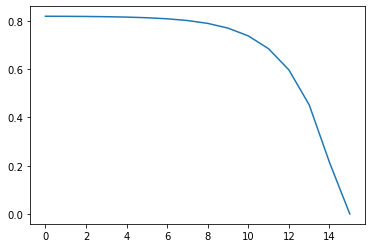

In [6]:
def empirical_strehl_function(G_mag):
    strehl_tmp = 0.82-np.exp((G_mag-15)/2)
    id_neg = strehl_tmp<0
    strehl_tmp[id_neg] = 0
    return strehl_tmp

G_mag_array = np.arange(16)
plt.plot(G_mag_array,empirical_strehl_function(G_mag_array))

In [7]:
table_complete['empirical_strehl'] = empirical_strehl_function(table_complete['simbad_FLUX_G'])

# Plotting Jmag = f(Gmag) with the Strehl in color scale 

Text(0.5, 0, 'G mag')

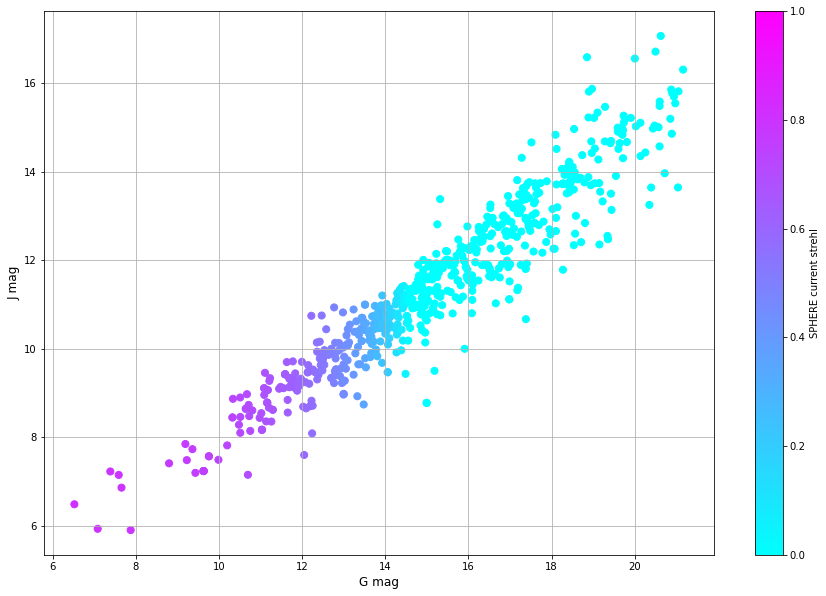

In [9]:
plt.close(0)
fig, ax = plt.subplots(1,1,figsize=(15,10),num=0)
scatter_plot = ax.scatter(table_complete['simbad_FLUX_G'],table_complete['simbad_FLUX_J'],c=table_complete['empirical_strehl'],\
          s=50,cmap=plt.cm.cool,marker='o')
scatter_plot.set_clim([0.,1])
cbar = fig.colorbar(scatter_plot,label='SPHERE current strehl')
ax.grid()
#ax.axvline(14)
ax.set_ylabel('J mag',fontsize=12)
ax.set_xlabel('G mag',fontsize=12)
#fig.savefig(path_target_list.joinpath('G_vs_J_with_strehl.pdf'))